# Course Project - LeadScoring

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data

In [3]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [4]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [7]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [8]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
df2['Specialization'] = df2['Specialization'].fillna('not provided')
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
df2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [18]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [21]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [22]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [23]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [24]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [26]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis = 1)
df_final.shape

(9074, 21)

## 2. EDA

###  Univariate Analysis:-

 Categorical Variables:-

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

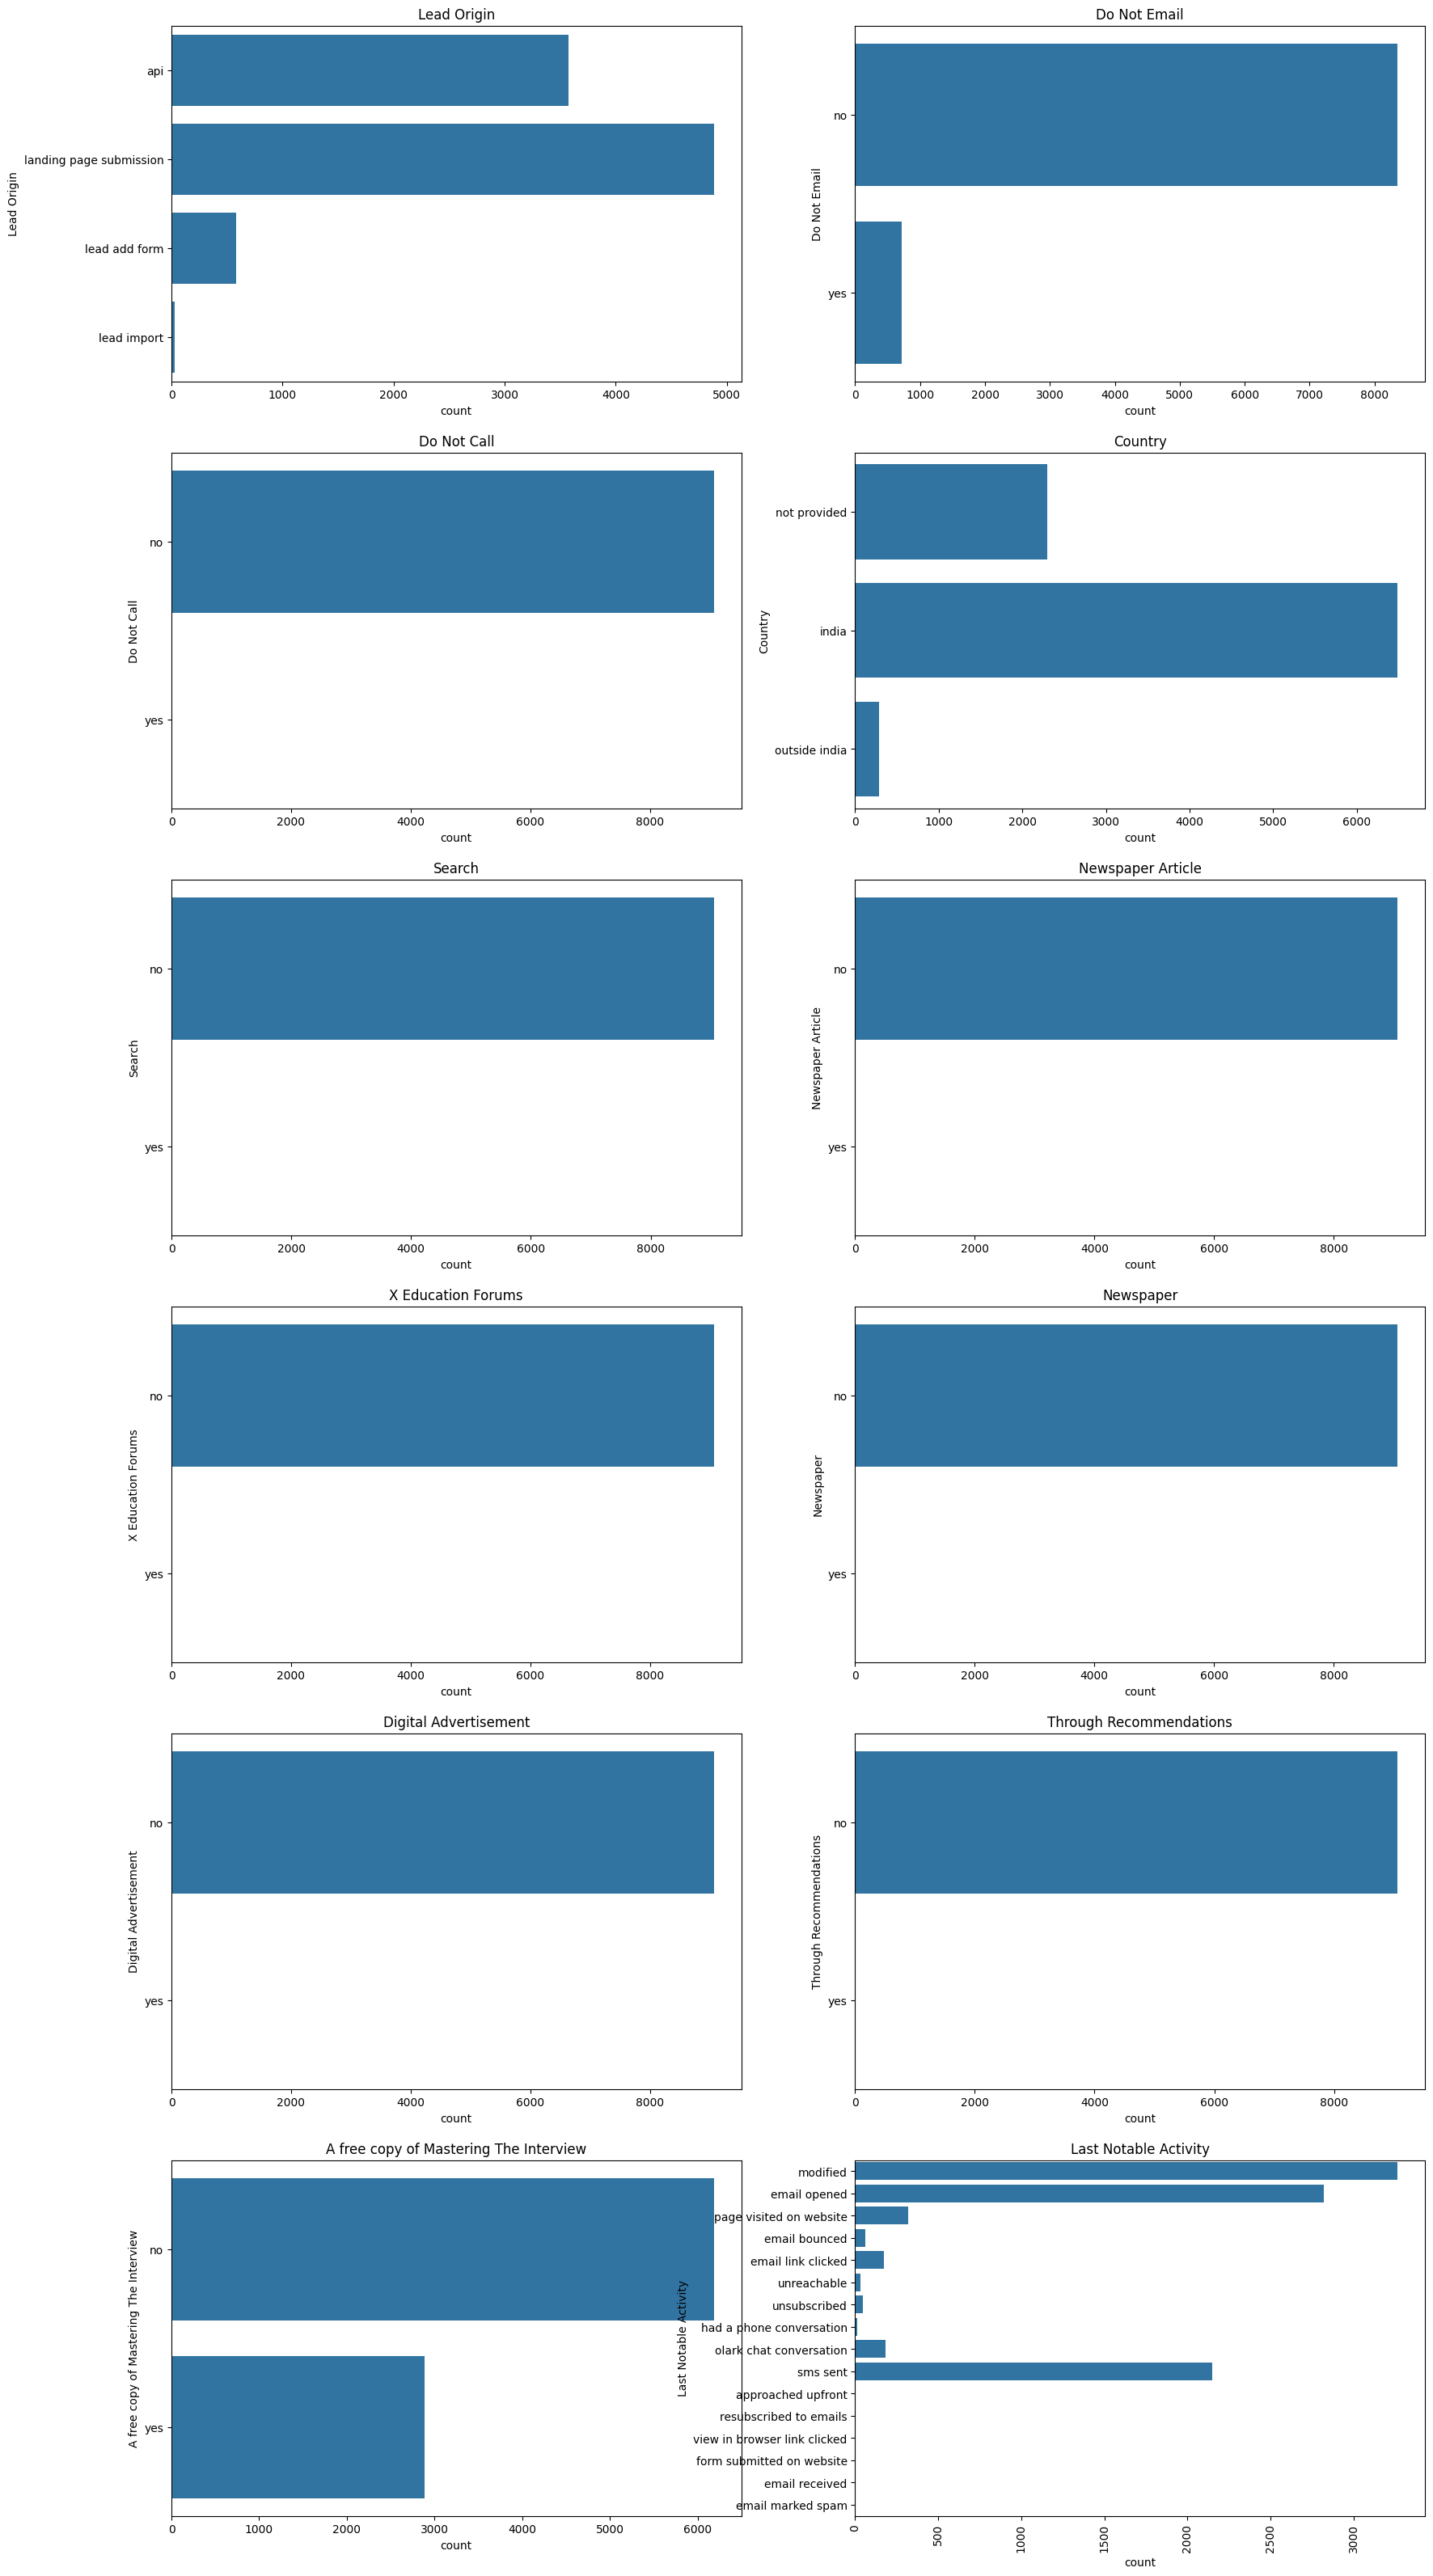

In [33]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

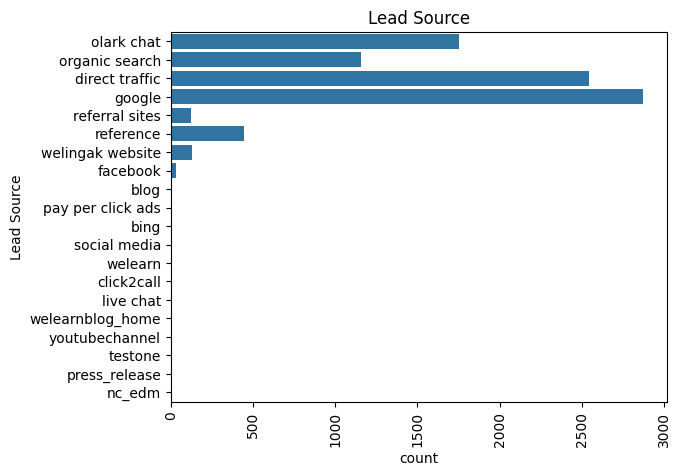

In [34]:
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

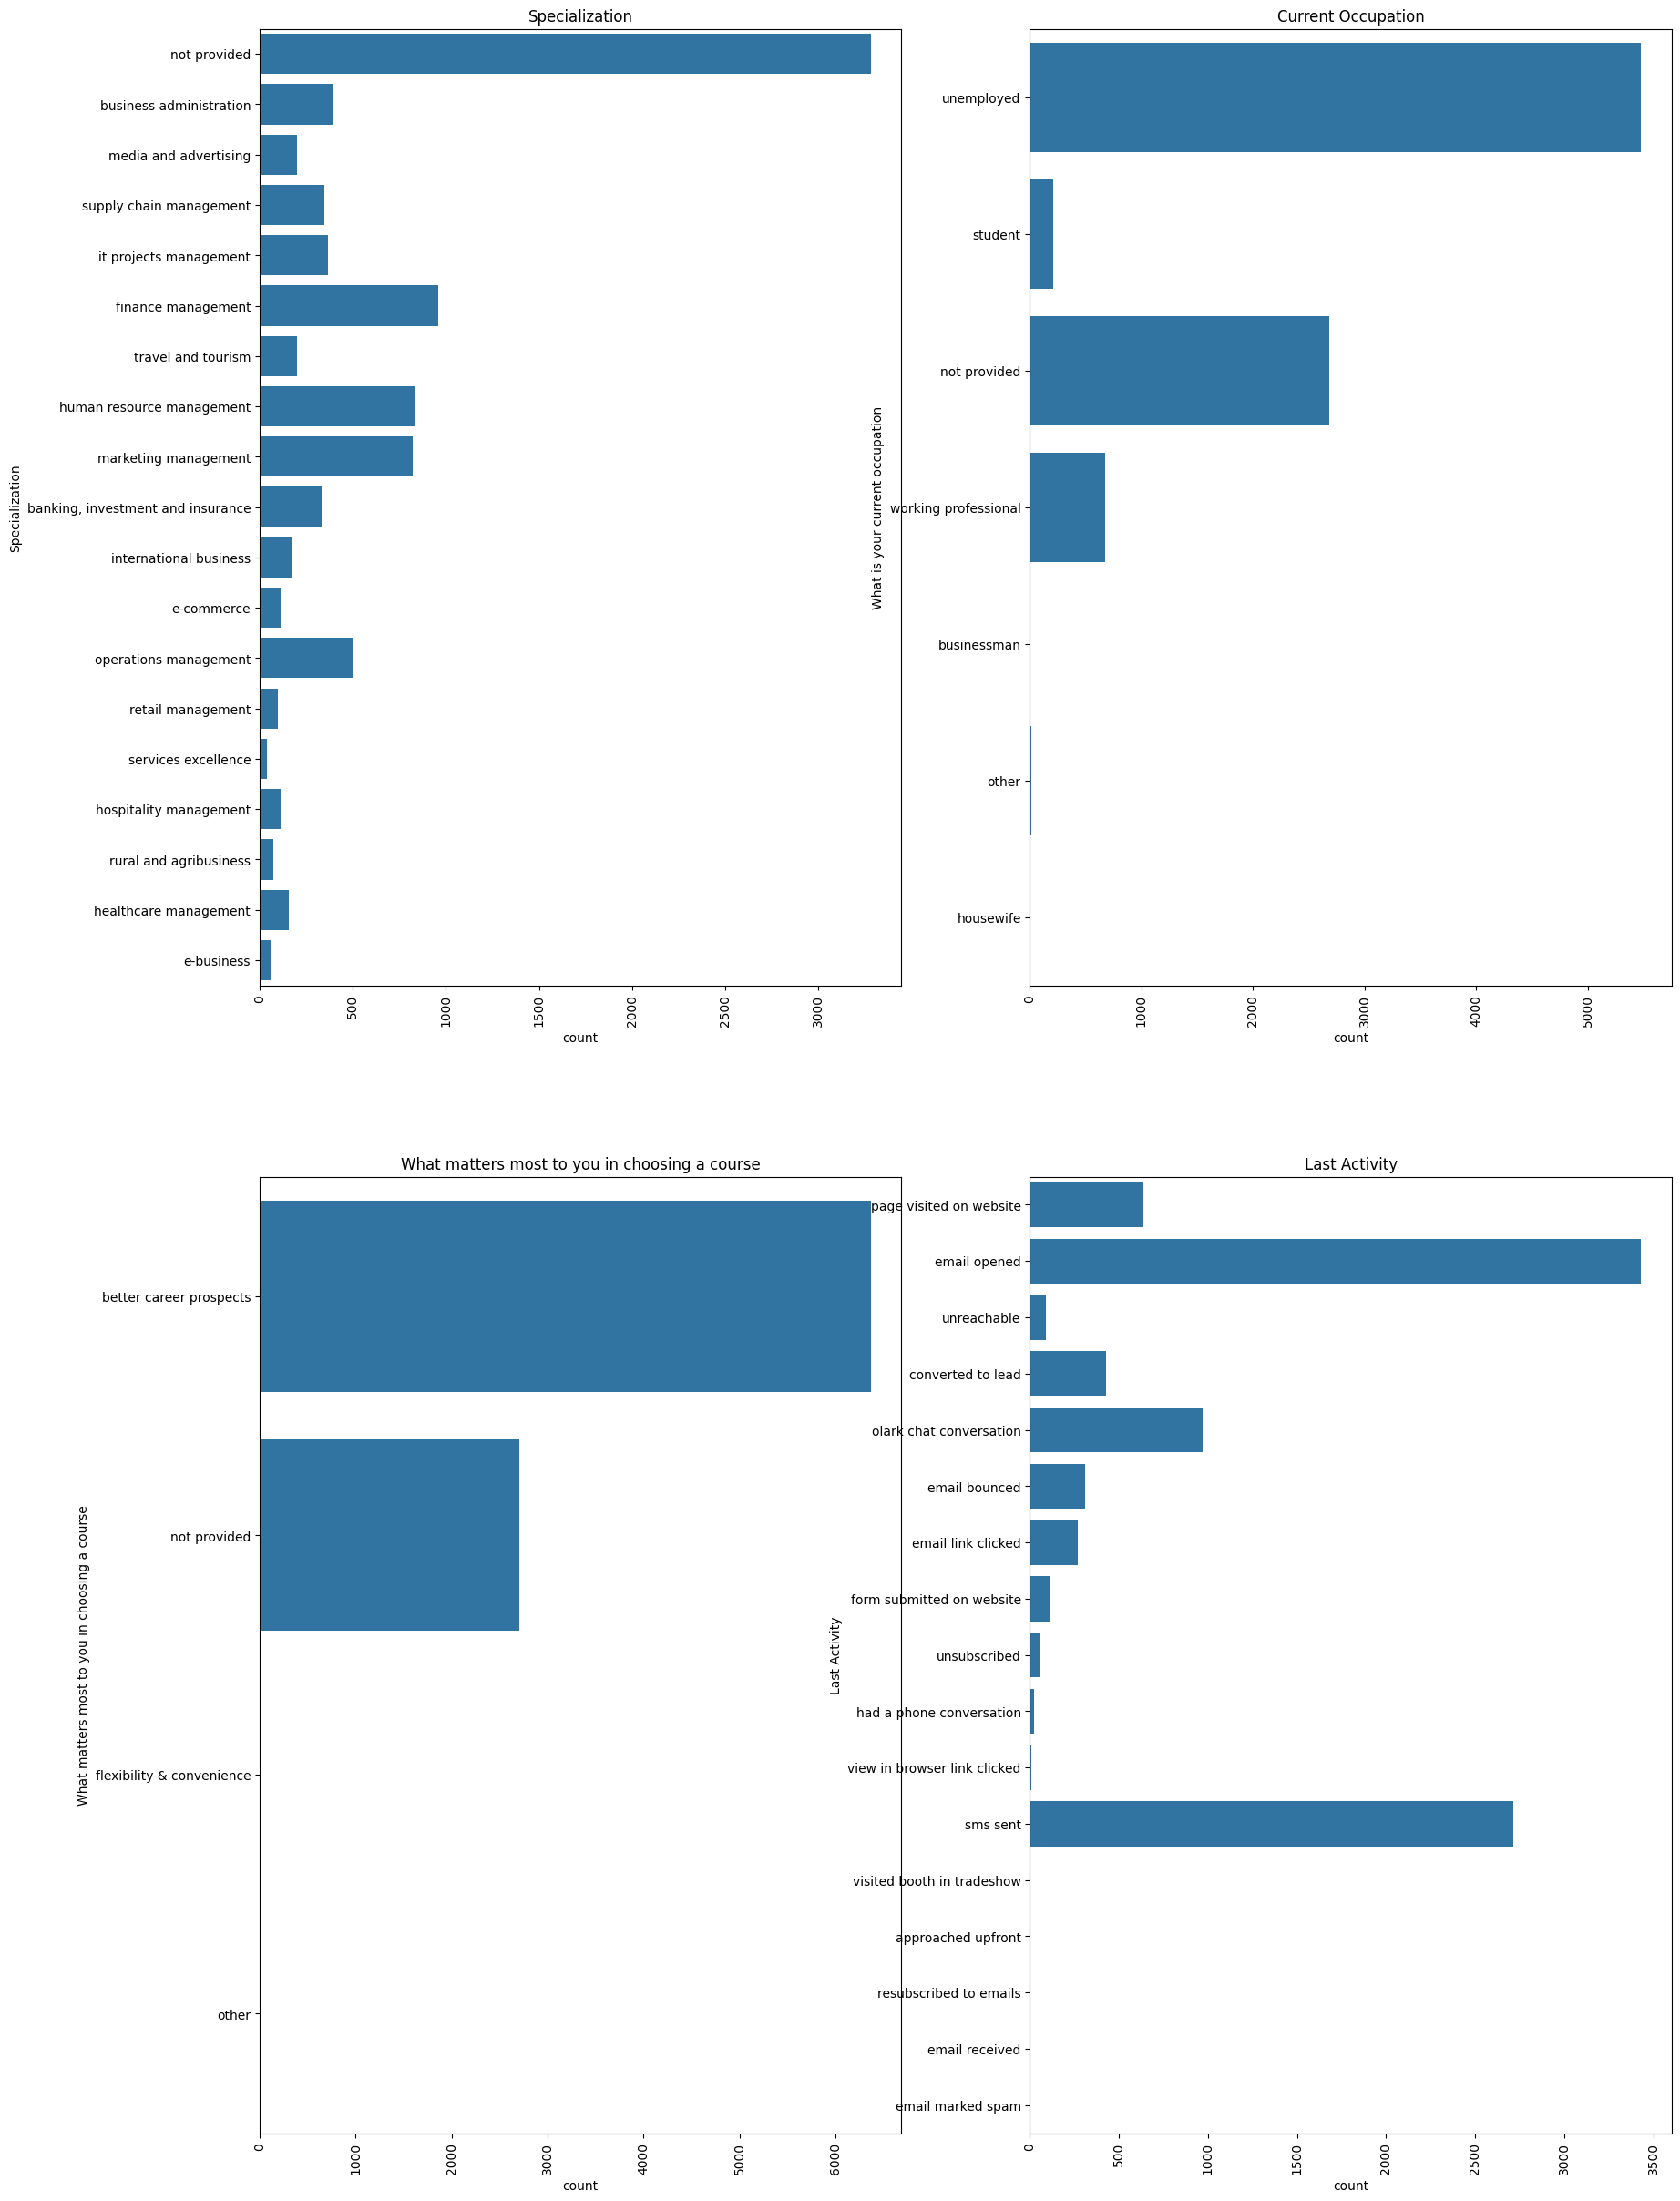

In [35]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

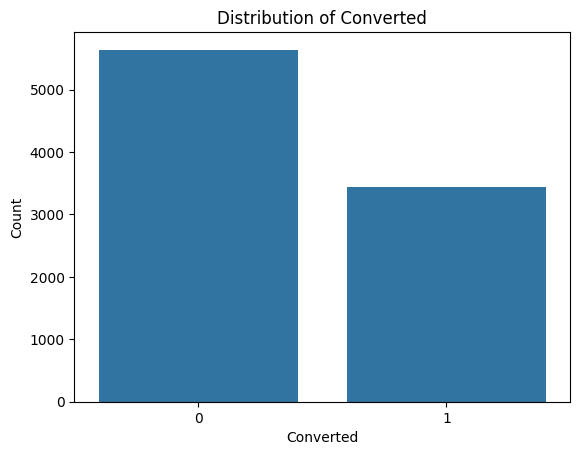

In [37]:
# Insight 1: Distribution of the Converted variable
sns.countplot(x='Converted', data=df_final)
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Distribution of Converted')
plt.show()

Numerical Variables

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

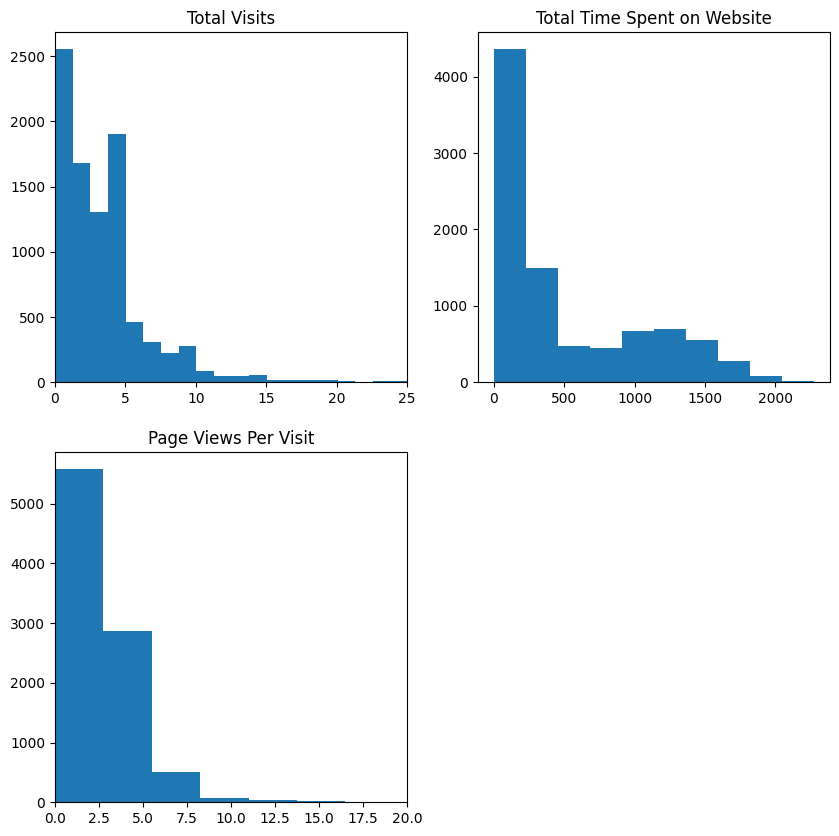

In [39]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

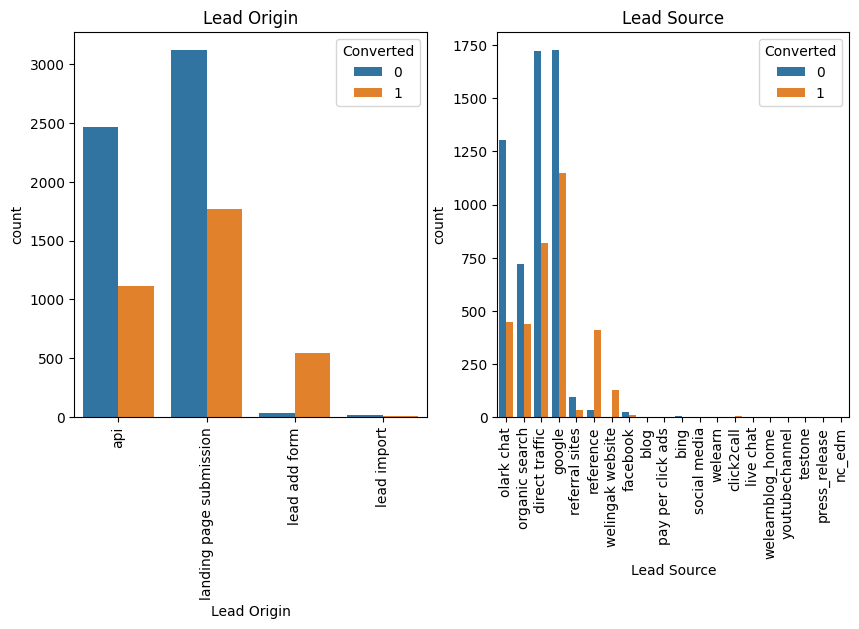

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

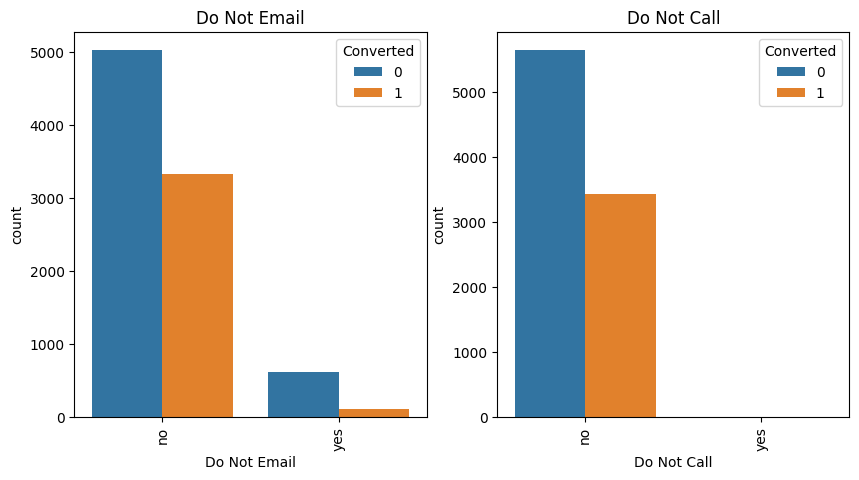

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

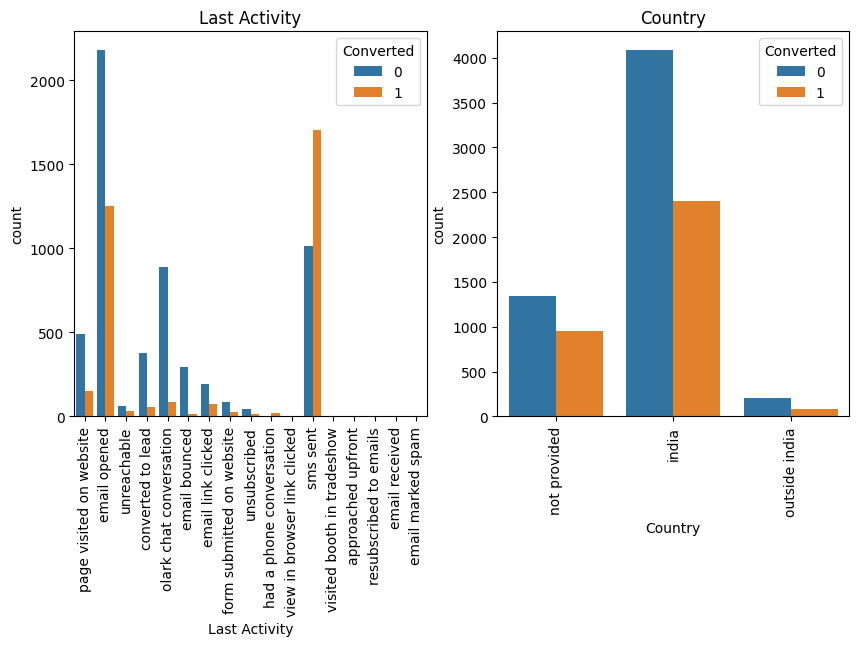

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

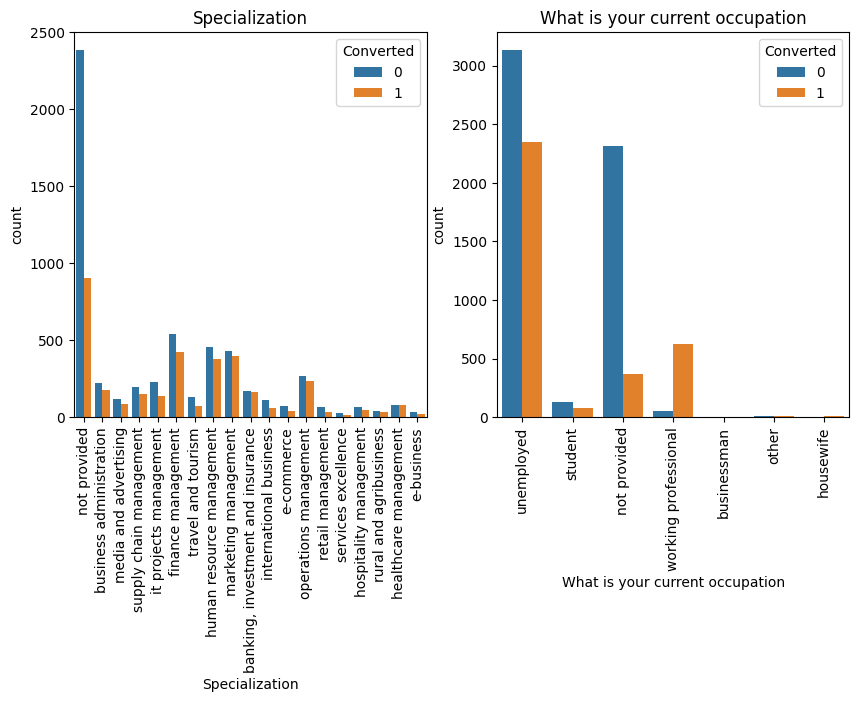

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

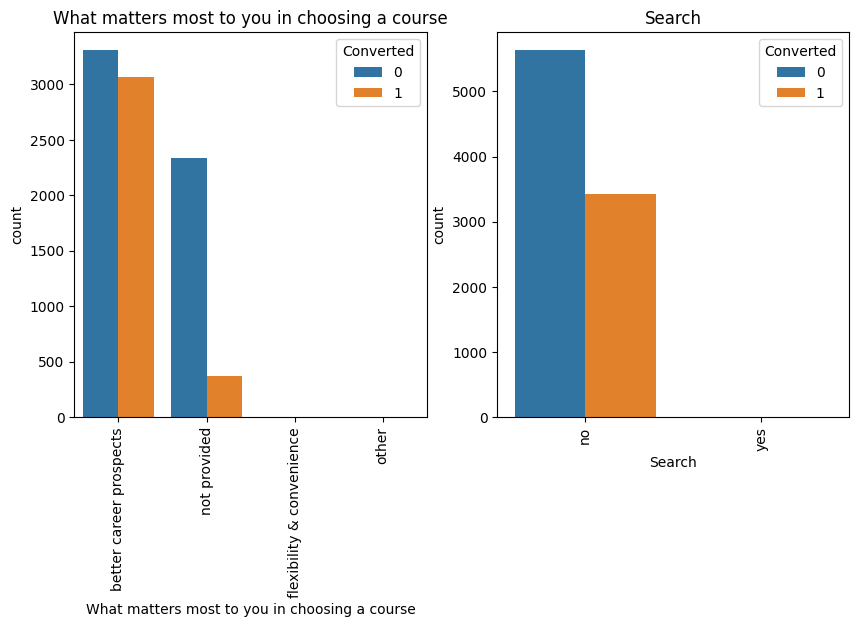

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

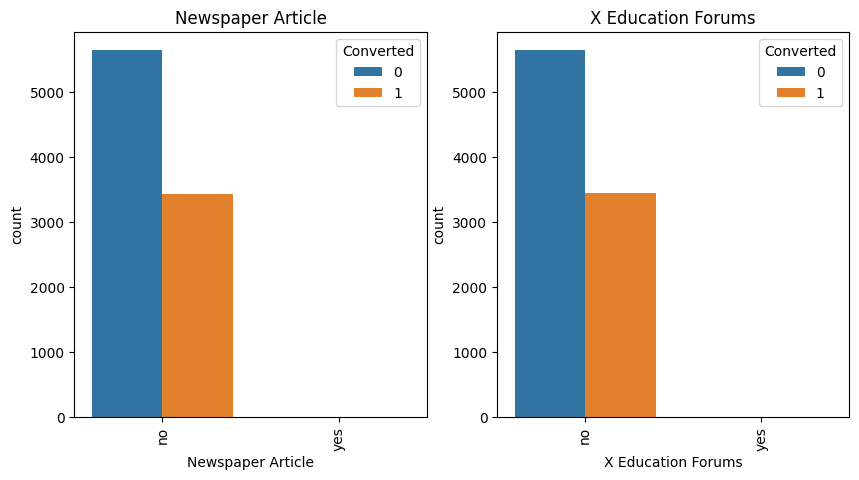

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

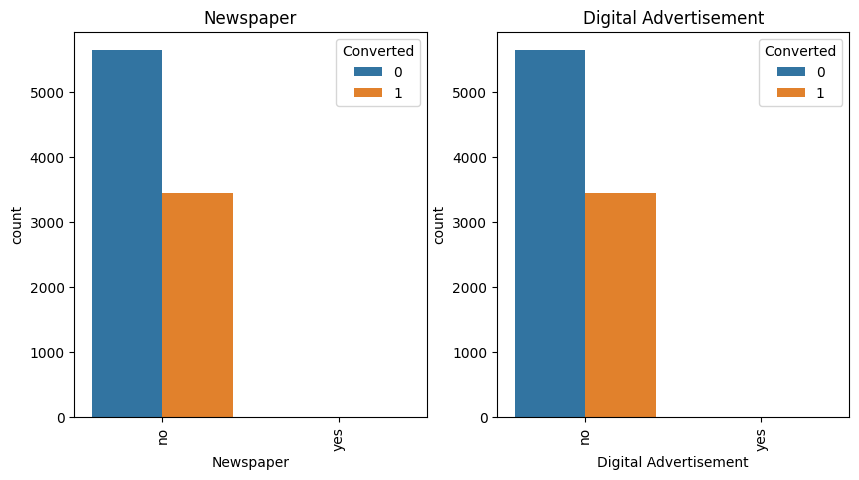

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

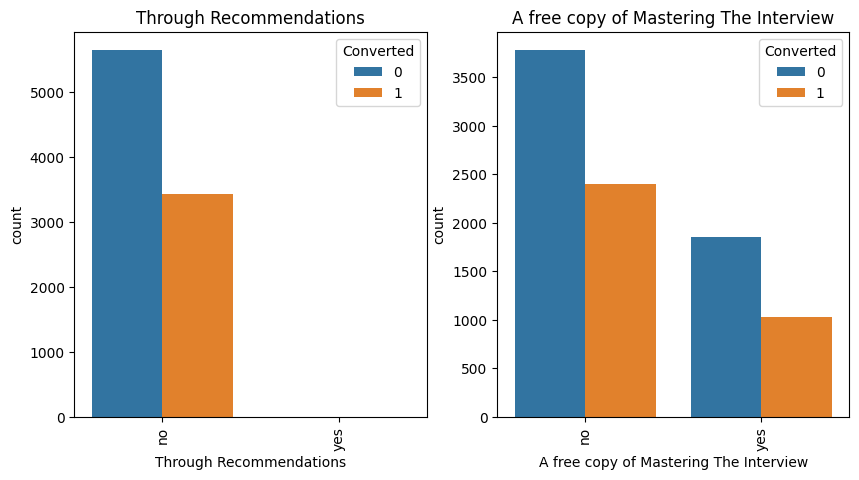

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

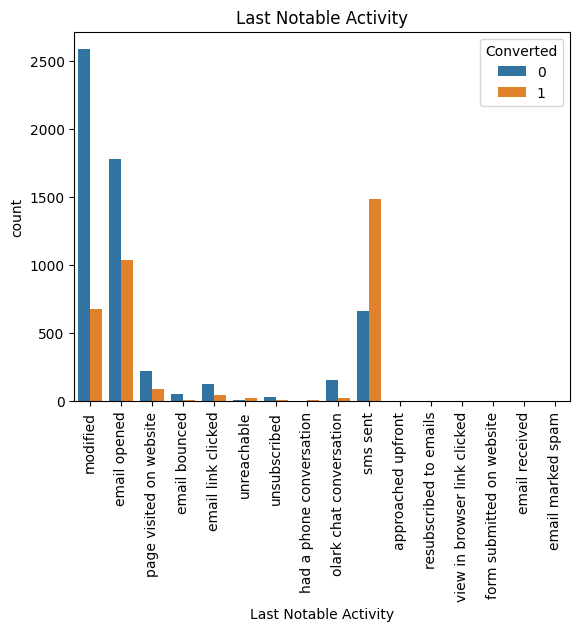

In [48]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

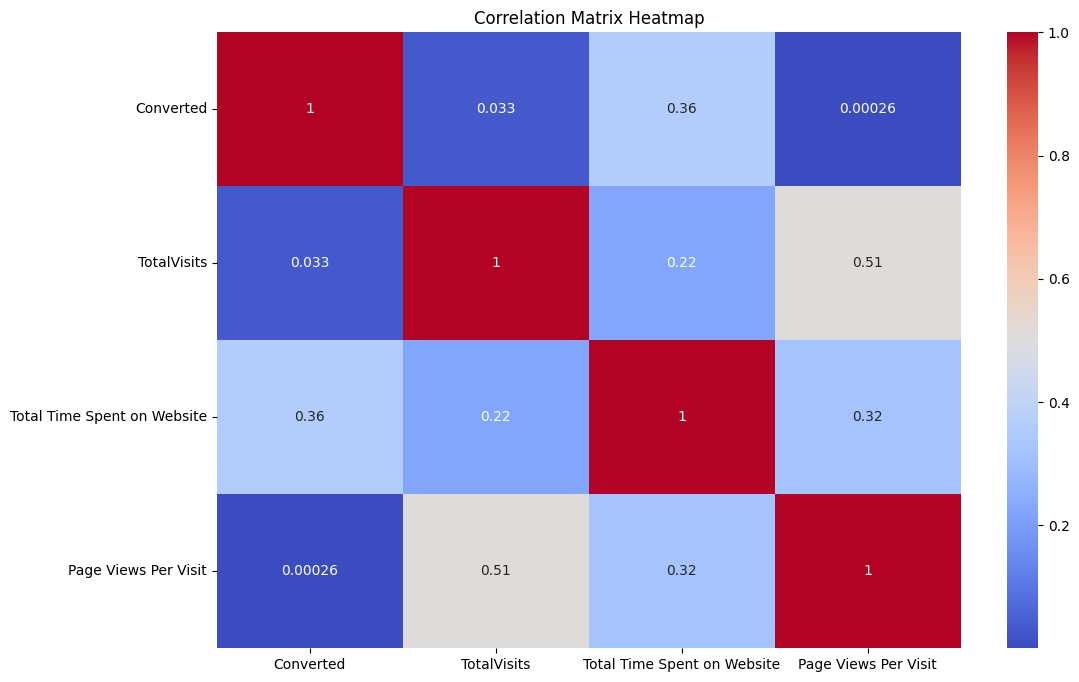

In [50]:
# Insight 2: Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_final.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


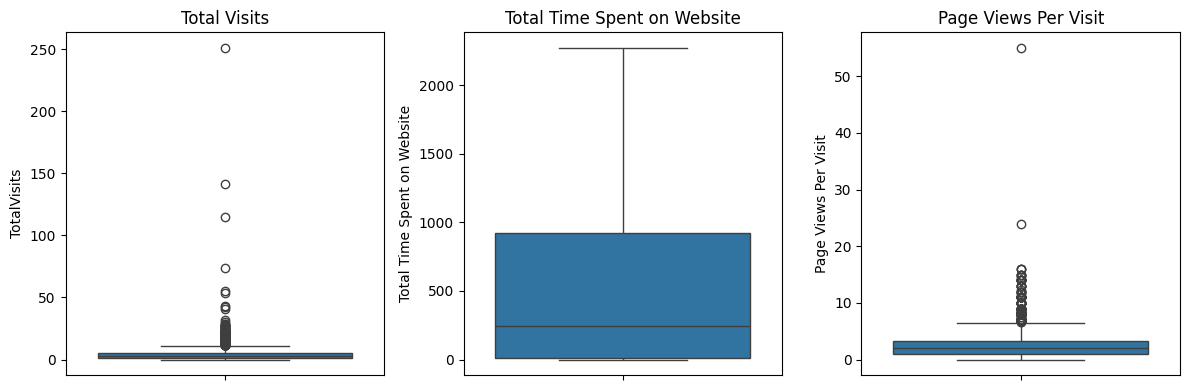

In [53]:
plt.figure(figsize=(12, 4))

# TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(df_final['TotalVisits'])
plt.title('Total Visits')

# Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(df_final['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

# Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(df_final['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.tight_layout()
plt.show()

Observation :-

* There are several significant outliers, with some values exceeding 50 and one extreme outlier around 250 in Total Visit.
* There are a few outliers, but they are not as extreme in Total Time Spent on Website.
*  There are several outliers, with some values exceeding 20 and one extreme outlier above 50 in Page Views Per Visit.  





Handaling Outlier :-

In [55]:
# Function to cap outliers at the 99th percentile
def cap_outliers(df_final, column):
    upper_limit = df_final[column].quantile(0.99)
    df_final[column] = np.where(df_final[column] > upper_limit, upper_limit, df_final[column])

In [56]:
# Apply to each relevant column
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for col in numerical_features:
    cap_outliers(df_final, col)

Recheck Outlier:-

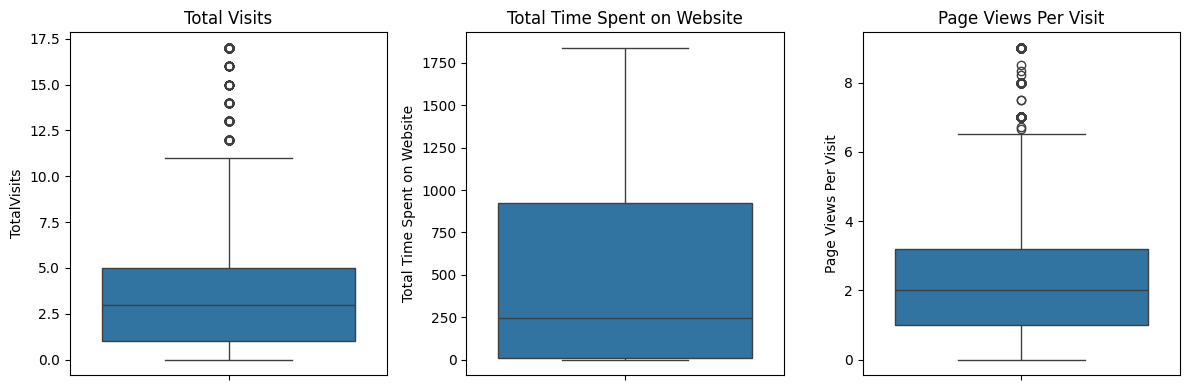

In [57]:
plt.figure(figsize=(12, 4))

# TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(df_final['TotalVisits'])
plt.title('Total Visits')

# Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(df_final['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

# Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(df_final['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.tight_layout()
plt.show()

## 3. Dummy Variables

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   float64
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [59]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [60]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0.0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674.0,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532.0,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305.0,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428.0,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1839.0,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238.0,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199.0,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499.0,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [62]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis= 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0.0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674.0,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532.0,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305.0,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428.0,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1839.0,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238.0,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199.0,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499.0,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## 4. Test-Train Split

In [63]:
# Import the required library
from sklearn.model_selection import train_test_split

In [65]:
X = df_final_dum.drop(['Converted'],axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0.0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674.0,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532.0,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305.0,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428.0,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [66]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [68]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.117647,0.756933,0.222222,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.352941,0.928766,0.666667,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.117647,0.973355,0.222222,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


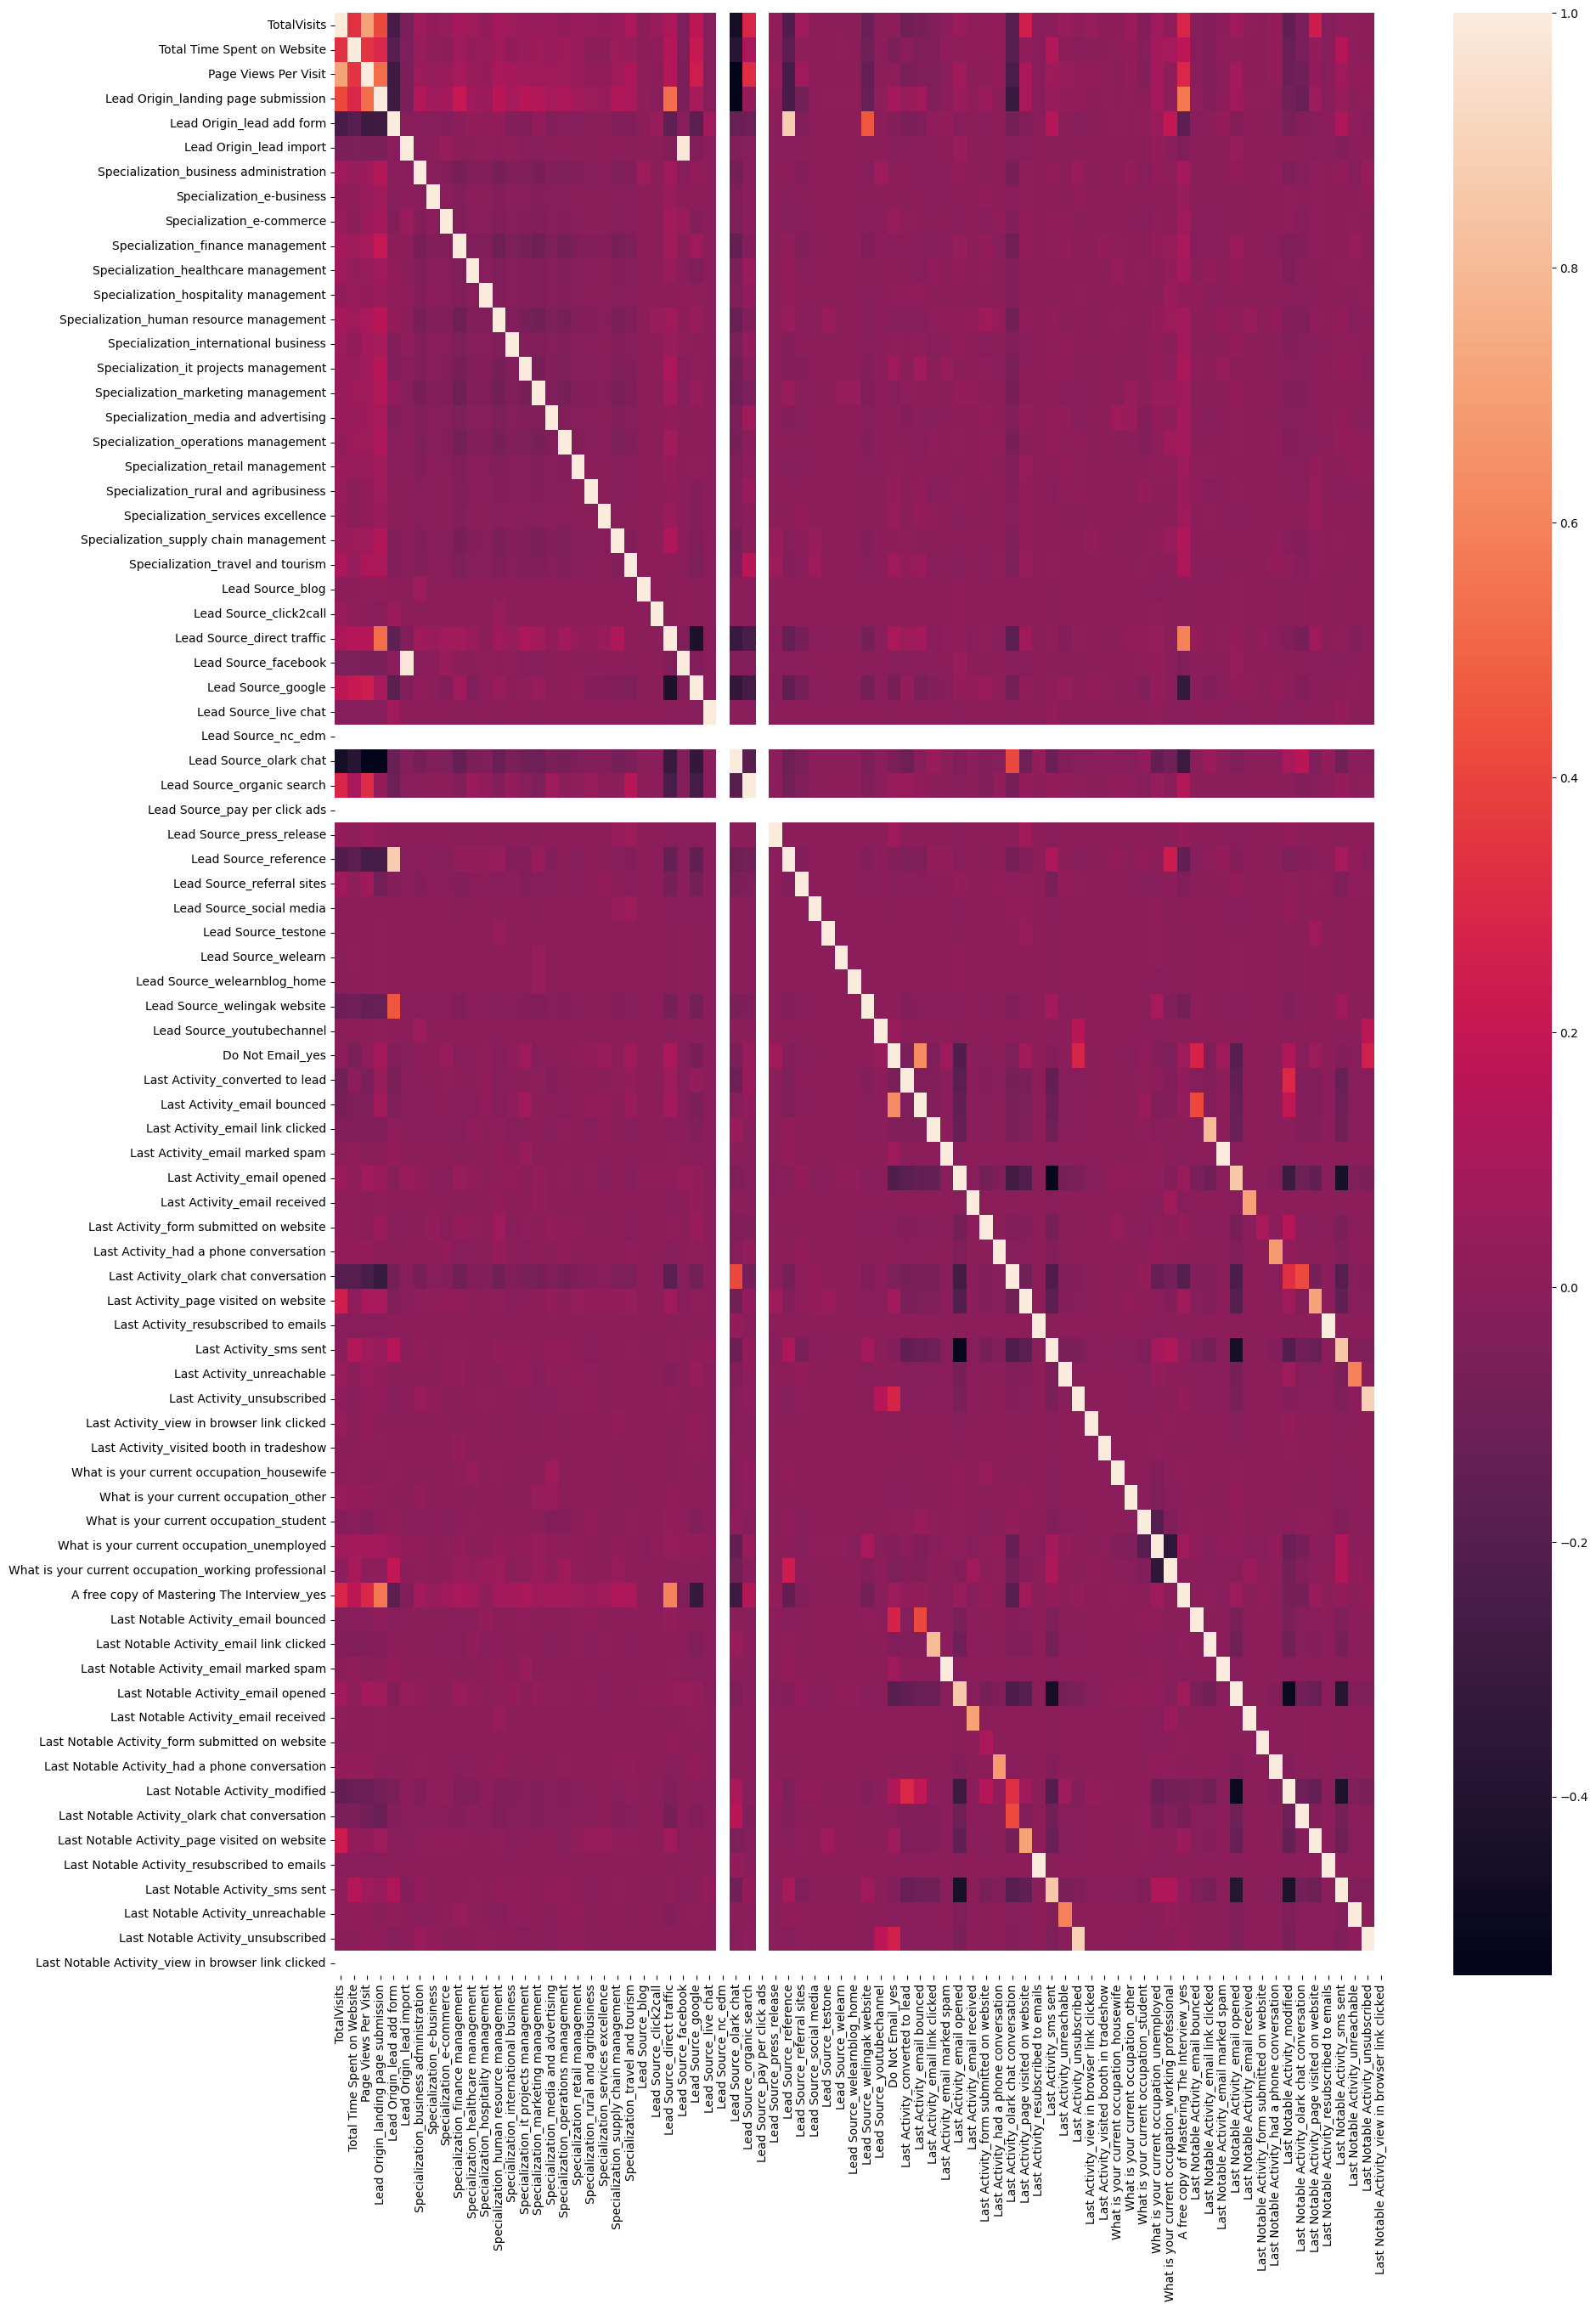

In [69]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## 5. Model Building

In [70]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
# Import RFE
from sklearn.feature_selection import RFE

In [72]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [73]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

NameError: name 'rfe' is not defined

In [74]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

NameError: name 'rfe' is not defined

In [75]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [76]:
# Importing statsmodels
import statsmodels.api as sm

In [77]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4237.7
Date:                Mon, 01 Jul 2024   Deviance:                       8475.4
Time:                        17:53:42   Pearson chi2:                 6.35e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          2.581e-06
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4650      0.040    -11.686      0.000      -0.543      -0.387
Page Views Per Visit     0.0149      0.116      0.128      0.898      -0.213       0.243
========================================================================================
"""

In [78]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

AttributeError: 'Series' object has no attribute 'columns'

In [85]:
X_train.drop('Last Notable Activity_had a phone conversation',axis =1, inplace = True)

ValueError: No axis named 1 for object type Series

In [86]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4237.7
Date:                Mon, 01 Jul 2024   Deviance:                       8475.4
Time:                        17:54:58   Pearson chi2:                 6.35e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          2.581e-06
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4650      0.040    -11.686      0.000      -0.543      -0.387
Page Views Per Visit     0.0149      0.116      0.128      0.898      -0.213       0.243
========================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

AttributeError: 'Series' object has no attribute 'columns'

In [89]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

ValueError: No axis named 1 for object type Series

In [90]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4237.7
Date:                Mon, 01 Jul 2024   Deviance:                       8475.4
Time:                        17:59:04   Pearson chi2:                 6.35e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          2.581e-06
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4650      0.040    -11.686      0.000      -0.543      -0.387
Page Views Per Visit     0.0149      0.116      0.128      0.898      -0.213       0.243
========================================================================================
"""

In [92]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

AttributeError: 'Series' object has no attribute 'columns'

In [93]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

ValueError: No axis named 1 for object type Series

In [94]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4237.7
Date:                Mon, 01 Jul 2024   Deviance:                       8475.4
Time:                        17:59:32   Pearson chi2:                 6.35e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          2.581e-06
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4650      0.040    -11.686      0.000      -0.543      -0.387
Page Views Per Visit     0.0149      0.116      0.128      0.898      -0.213       0.243
========================================================================================
"""

In [98]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

AttributeError: 'Series' object has no attribute 'columns'

## 6. Creating Prediction

In [99]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.386574
3604    0.385790
5584    0.388143
7679    0.385790
7563    0.386574
7978    0.386249
7780    0.388340
7863    0.385790
838     0.386574
708     0.386378
dtype: float64

In [100]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38657421, 0.38579045, 0.38814349, 0.38579045, 0.38657421,
       0.38624888, 0.38833982, 0.38579045, 0.38657421, 0.38637822])

In [101]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.386574
1,0,0.385790
2,0,0.388143
3,0,0.385790
4,0,0.386574


In [102]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.386574,0
1,0,0.385790,0
2,0,0.388143,0
3,0,0.385790,0
4,0,0.386574,0


## 7. Model Evaluation

In [103]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [104]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3895,    0],
       [2456,    0]])

In [105]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [106]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6132892457880649

In [107]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1]
# Substituting the value of false negatives
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.0

In [109]:
# Calculating the specificity
TN/(TN+FP)

1.0

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

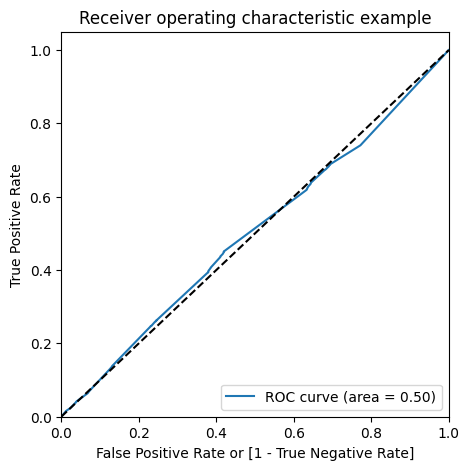

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [113]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.386574,0,1,1,1,1,0,0,0,0,0,0
1,0,0.385790,0,1,1,1,1,0,0,0,0,0,0
2,0,0.388143,0,1,1,1,1,0,0,0,0,0,0
3,0,0.385790,0,1,1,1,1,0,0,0,0,0,0
4,0,0.386574,0,1,1,1,1,0,0,0,0,0,0


In [114]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.0,0.0
0.1,0.1,0.386711,1.0,0.0
0.2,0.2,0.386711,1.0,0.0
0.3,0.3,0.386711,1.0,0.0
0.4,0.4,0.613289,0.0,1.0
0.5,0.5,0.613289,0.0,1.0
0.6,0.6,0.613289,0.0,1.0
0.7,0.7,0.613289,0.0,1.0
0.8,0.8,0.613289,0.0,1.0
0.9,0.9,0.613289,0.0,1.0


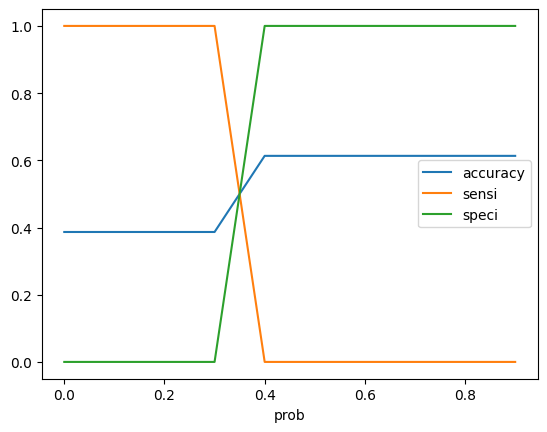

In [115]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.386574,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.385790,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.388143,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.385790,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.386574,0,1,1,1,1,0,0,0,0,0,0,1


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.3867107542119351

In [118]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[   0, 3895],
       [   0, 2456]])

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Calculating the sensitivity
TP/(TP+FN)

1.0

In [121]:
# Calculating the specificity
TN/(TN+FP)

0.0

## 8. Prediction on Test set

In [122]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [124]:
# Substituting all the columns in the final train model
col = X_train.columns

AttributeError: 'Series' object has no attribute 'columns'

In [125]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

KeyError: 'Page Views Per Visit'

In [129]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

NameError: name 'X_test_sm' is not defined

In [ ]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [130]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

NameError: name 'y_pred_final' is not defined

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

1.0

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.0

## 9. Precision-Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3895,    0],
       [2456,    0]])

In [135]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

nan

In [136]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.0

### 9.1. Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

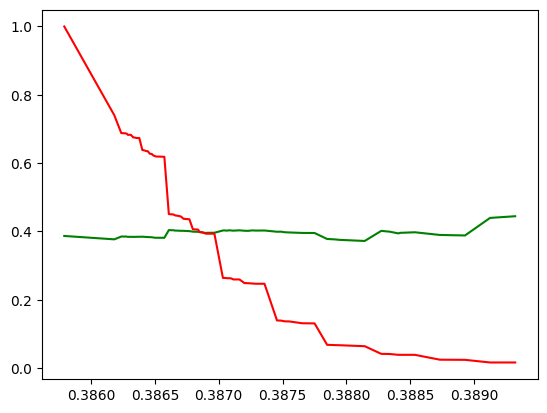

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.386574,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.385790,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.388143,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.385790,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.386574,0,1,1,1,1,0,0,0,0,0,0,0


In [142]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6132892457880649

In [143]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3895,    0],
       [2456,    0]])

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Precision = TP / TP + FP
TP / (TP + FP)

nan

In [146]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.0

## 10. Prediction on Test set

In [148]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

NameError: name 'X_test_sm' is not defined

In [149]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

NameError: name 'y_pred_final' is not defined

In [150]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

NameError: name 'y_pred_final' is not defined

In [151]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

NameError: name 'y_pred_final' is not defined

In [152]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [153]:
# Precision = TP / TP + FP
TP / (TP + FP)

nan

In [154]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.0